## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17574 files belonging to 38 classes.


In [4]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[128.25 122.25 136.25]
   [139.25 133.25 147.25]
   [143.25 137.25 151.25]
   ...
   [173.   169.   184.  ]
   [171.   167.   182.  ]
   [167.75 163.75 178.75]]

  [[139.75 133.75 147.75]
   [153.25 147.25 161.25]
   [140.5  134.5  148.5 ]
   ...
   [173.   169.   184.  ]
   [171.75 167.75 182.75]
   [169.75 165.75 180.75]]

  [[140.75 134.75 148.75]
   [146.75 140.75 154.75]
   [136.25 130.25 144.25]
   ...
   [169.   165.   180.  ]
   [168.75 164.75 179.75]
   [169.25 165.25 180.25]]

  ...

  [[141.5  137.5  151.5 ]
   [149.25 145.25 159.25]
   [152.75 148.75 162.75]
   ...
   [180.   178.   192.  ]
   [177.5  175.5  189.5 ]
   [179.5  177.5  191.5 ]]

  [[155.   151.   165.  ]
   [150.   146.   160.  ]
   [156.75 152.75 166.75]
   ...
   [179.75 177.75 191.75]
   [182.75 180.75 194.75]
   [186.5  184.5  198.5 ]]

  [[142.25 138.25 152.25]
   [159.25 155.25 169.25]
   [152.   148.   162.  ]
   ...
   [179.75 177.75 191.75]
   [181.   179.   193.  ]
   [178.5  176.5  19

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model 
unable to capture relevant feature or model is confusing due to lack of feature so feed with more 
feature

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## Building Convolution Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

## Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 234s 103ms/step - loss: 1.3646 - accuracy: 0.5967 - val_loss: 0.4490 - val_accuracy: 0.8580
Epoch 2/10
2197/2197 [==============================] - 125s 57ms/step - loss: 0.4364 - accuracy: 0.8604 - val_loss: 0.2718 - val_accuracy: 0.9136
Epoch 3/10
2197/2197 [==============================] - 123s 56ms/step - loss: 0.2636 - accuracy: 0.9155 - val_loss: 0.1933 - val_accuracy: 0.9357
Epoch 4/10
2197/2197 [==============================] - 123s 56ms/step - loss: 0.1841 - accuracy: 0.9401 - val_loss: 0.2680 - val_accuracy: 0.9177
Epoch 5/10
2197/2197 [==============================] - 122s 56ms/step - loss: 0.1366 - accuracy: 0.9548 - val_loss: 0.2004 - val_accuracy: 0.9401
Epoch 6/10
2197/2197 [==============================] - 122s 56ms/step - loss: 0.1097 - accuracy: 0.9645 - val_loss: 0.1284 - val_accuracy: 0.9608
Epoch 7/10
2197/2197 [==============================] - 122s 56ms/step - loss: 0.0887 - accuracy: 0.9713 - val_loss: 

## Model Evaluation

In [21]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 44s 20ms/step - loss: 0.0197 - accuracy: 0.9937


In [22]:
print(train_loss,train_acc)

0.019723741337656975 0.993698000907898


In [23]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 11s 20ms/step - loss: 0.0970 - accuracy: 0.9709


In [24]:
print(val_loss,val_acc)

0.09702751785516739 0.9708660244941711


## Saving Model

In [25]:
model.save("trained_model.keras")

In [26]:
training_history.history

{'loss': [1.3646363019943237,
  0.43635937571525574,
  0.2636251747608185,
  0.18414299190044403,
  0.1365814357995987,
  0.10969462990760803,
  0.08871113508939743,
  0.07308729737997055,
  0.06453156471252441,
  0.056820712983608246],
 'accuracy': [0.5966711640357971,
  0.8603599071502686,
  0.9154989719390869,
  0.9401095509529114,
  0.9548189640045166,
  0.9645351767539978,
  0.9713208675384521,
  0.976456344127655,
  0.9790881276130676,
  0.9811224341392517],
 'val_loss': [0.44900625944137573,
  0.271798700094223,
  0.19331981241703033,
  0.26798081398010254,
  0.20040343701839447,
  0.1283869445323944,
  0.09155777841806412,
  0.14612466096878052,
  0.11991419643163681,
  0.09702745079994202],
 'val_accuracy': [0.8579720258712769,
  0.9136223793029785,
  0.9357004761695862,
  0.9177193641662598,
  0.9400819540023804,
  0.9607943296432495,
  0.9710936546325684,
  0.9560145735740662,
  0.9649482369422913,
  0.9708660244941711]}

In [27]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [28]:
training_history.history['val_accuracy']

[0.8579720258712769,
 0.9136223793029785,
 0.9357004761695862,
 0.9177193641662598,
 0.9400819540023804,
 0.9607943296432495,
 0.9710936546325684,
 0.9560145735740662,
 0.9649482369422913,
 0.9708660244941711]

## Accuracy Visualization

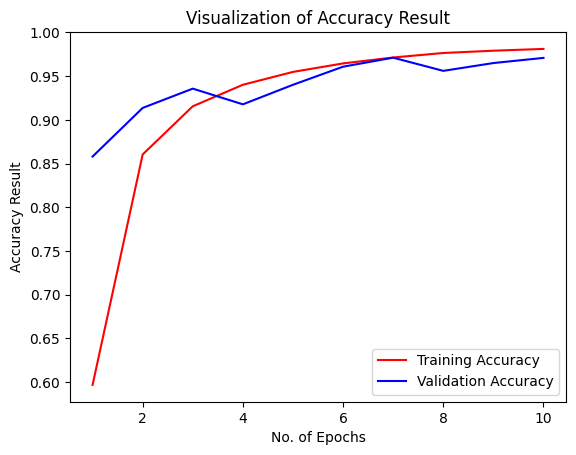

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [30]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17574 files belonging to 38 classes.


In [32]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 10s 18ms/step


(array([[9.9999547e-01, 6.5151596e-07, 3.0282027e-10, ..., 5.4317220e-15,
         5.3151775e-14, 2.4943266e-13],
        [9.9978346e-01, 9.2546710e-05, 1.0483855e-08, ..., 1.4143839e-11,
         9.6347104e-11, 3.6981415e-10],
        [9.9998140e-01, 1.8647852e-05, 1.2153503e-08, ..., 3.0432179e-15,
         9.1694317e-13, 3.6244573e-12],
        ...,
        [1.5495618e-09, 4.4768323e-13, 7.7057005e-10, ..., 5.3107987e-12,
         5.1620422e-12, 1.0000000e+00],
        [6.0901180e-11, 6.0965794e-15, 1.3455061e-11, ..., 1.1162995e-12,
         4.4876131e-13, 1.0000000e+00],
        [3.4265663e-10, 1.3277727e-11, 3.1817987e-10, ..., 9.0812401e-12,
         1.4040897e-09, 9.9999058e-01]], dtype=float32),
 (17574, 38))

In [33]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [34]:
predicted_categories

<tf.Tensor: shape=(17574,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [35]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17574, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [36]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17574,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       506
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.98      0.96      0.97       502
                               Blueberry___healthy       0.99      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.93      0.99      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.92      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.98      0.

In [39]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[489,   7,   0, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  0,   0, 436, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 446,   0],
       [  0,   0,   1, ...,   0,   0, 459]], dtype=int64)

### Confusion Matrix Visualization

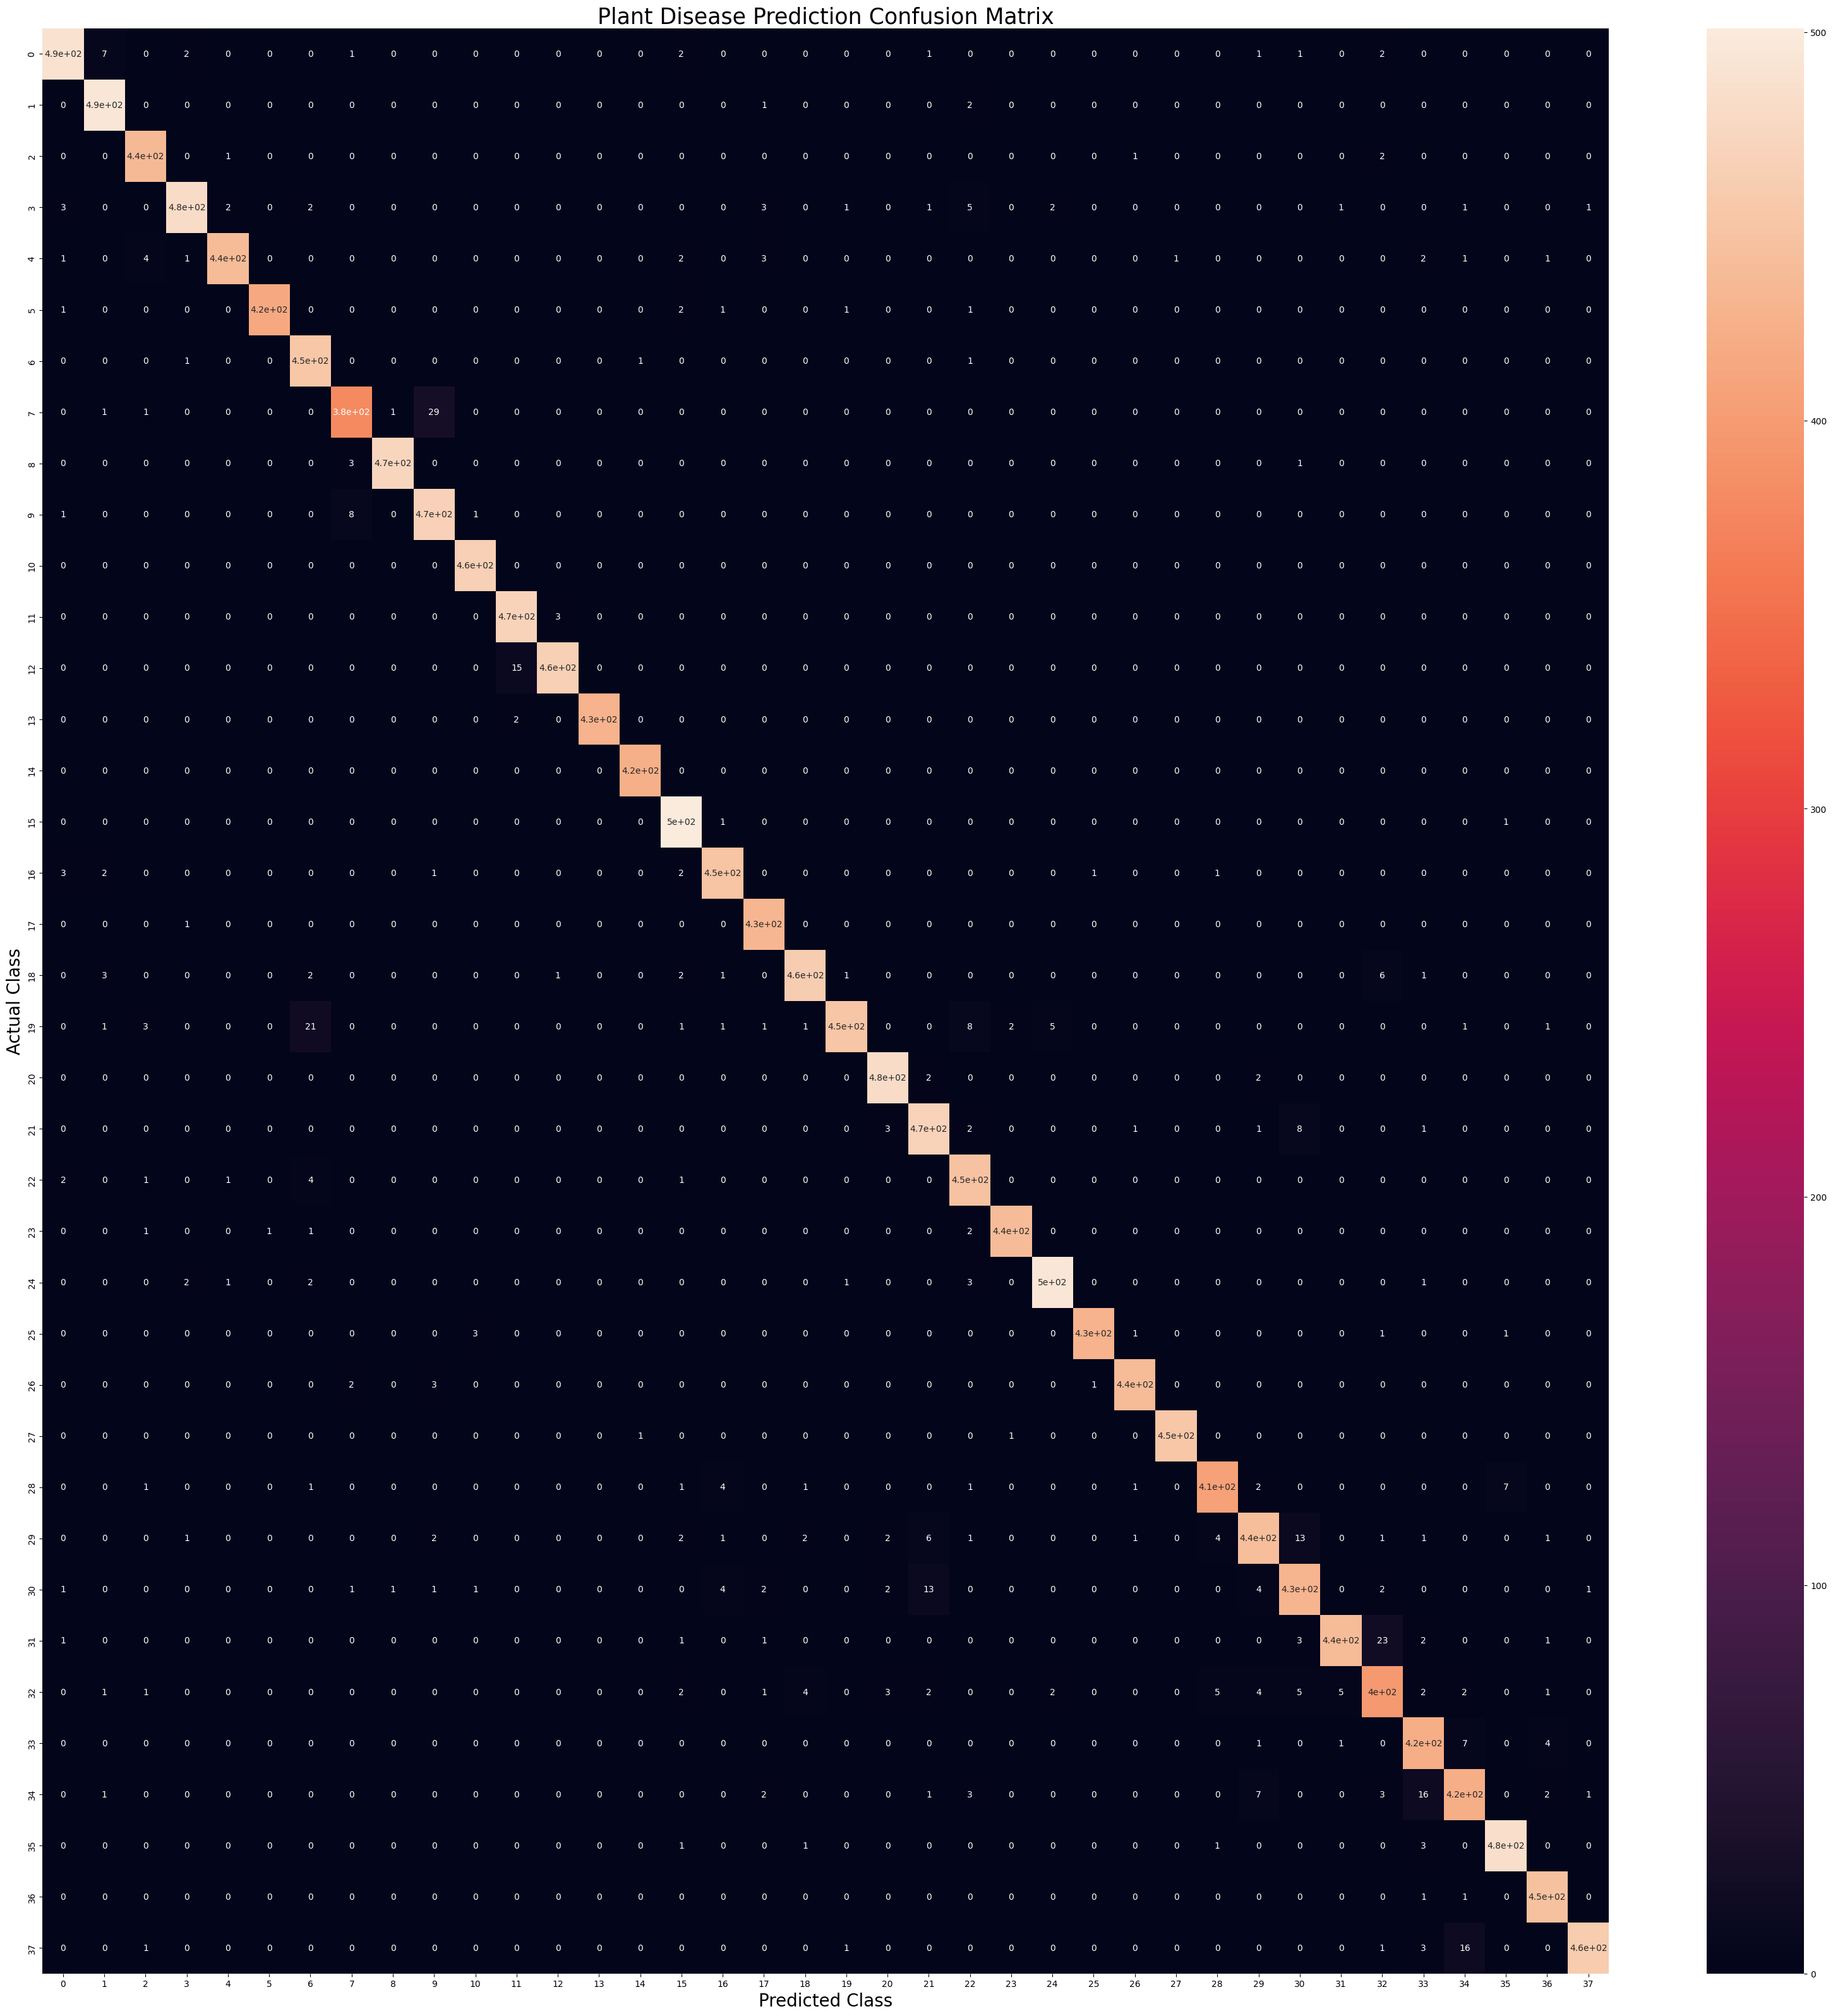

In [40]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()